In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

**Problem 1**

In [2]:
def randwalk(nsteps = 100, nsamples = 1000):
    nsteps = int(nsteps)
    nsamples = int(nsamples)
    rms = np.zeros(nsteps)
    trajectories_x = np.zeros([nsamples, nsteps])
    trajectories_y = np.zeros([nsamples, nsteps])
    trajectories_z = np.zeros([nsamples, nsteps])
    
    for ii in range(nsamples):
        # draw a random number for theta between -π/2 and π/2 for each step
        # draw a random number for phi between -π and π for each step to move around x-y plane
        # exclude first point, becuase we want to start at 0
        
        theta0 = np.pi*(np.random.ranf(nsteps-1) -0.5)
        phi0 = 2*np.pi*(np.random.ranf(nsteps-1) -0.5)
        #print(phi0)
        
        # always start at 0
        theta0 = np.insert(theta0,0,0,axis= 0)
        phi0=np.insert(phi0,0,0,axis= 0)
        
        # take steps
        traj_x = np.cumsum(np.cos(theta0)*np.cos(phi0))
        traj_y = np.cumsum(np.cos(theta0)*np.sin(phi0))
        traj_z = np.cumsum(np.sin(theta0))
        
        # update trajectories array and displacement squared array
        trajectories_x[ii,:] = traj_x
        trajectories_y[ii,:] = traj_y
        trajectories_z[ii,:] = traj_z
        rms+=(traj_x**2+traj_y**2+traj_z**2)
        #print(traj_x**2+traj_y**2+traj_z**2)
        #print('rms=',rms)
    
    trajectories_x = np.array(trajectories_x)
    trajectories_y = np.array(trajectories_y)
    trajectories_z = np.array(trajectories_z)
    return rms/nsamples, trajectories_x, trajectories_y, trajectories_z

In [8]:
nsteps = 500
nsamples = 100000
rms, trajectories_x,trajectories_y,trajectories_z = randwalk(nsteps, nsamples)
#print(np.shape(rms))
#print(np.arange(0,len(rms),50))
#print(trajectories)

<IPython.core.display.Javascript object>


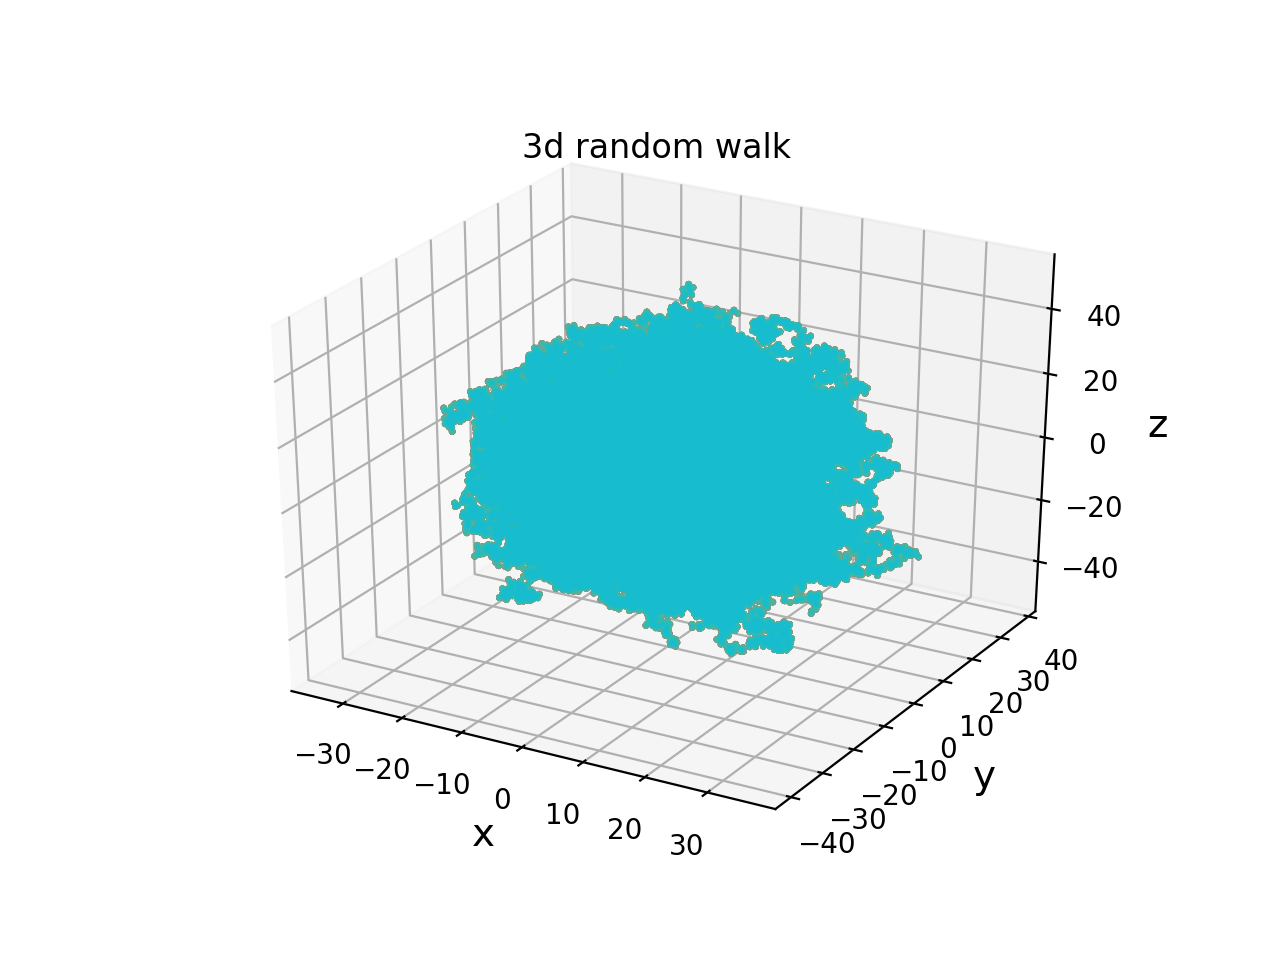

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
cnt=-1
#c=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w','b','g','r']
# plot every 50th trajectory, so the plot is not too crowded
for ii in np.arange(0,len(rms),50):
    cnt+=1
    ax.scatter(trajectories_x,trajectories_y, trajectories_z,marker='o',s=2)

# put a horizontal line at y=0
#ax.hlines(0,0,1.1*nsteps, linestyles = 'dashed', zorder = 10) #zorder sets the layer order in the plot

ax.set_xlabel('x', fontsize = 14)
ax.set_ylabel('y', fontsize = 14)
ax.set_zlabel('z', fontsize = 14)
ax.set_title('3d random walk')

plt.show()

From 3d random walker figure we can see that the motion is diffusive that the walker becomes far away from the origin.

<IPython.core.display.Javascript object>


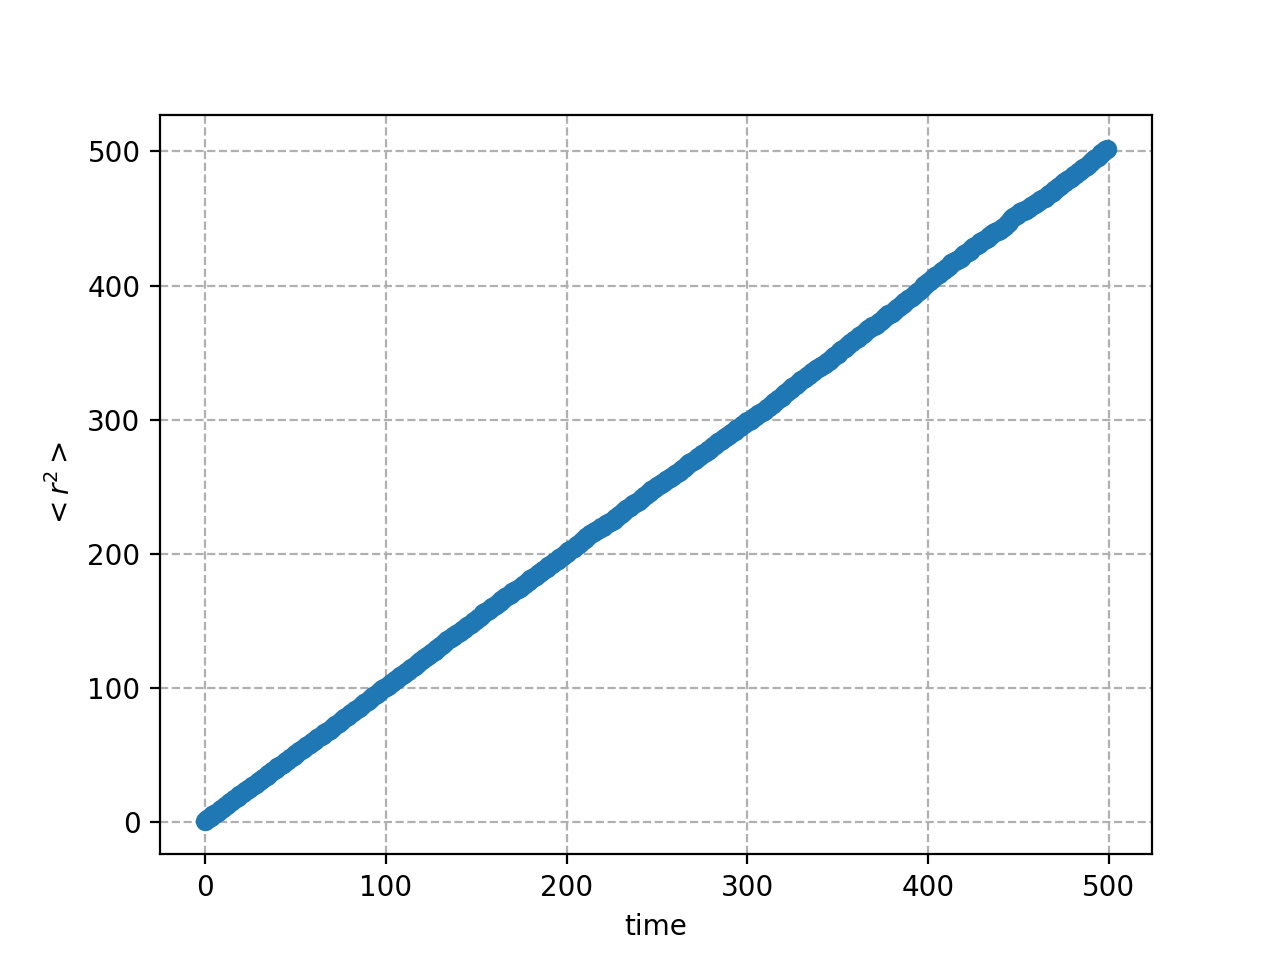

<function matplotlib.pyplot.show(*args, **kw)>

In [173]:
s=np.arange(0,nsteps,1)
fig1=plt.figure()
ax1=fig1.add_subplot(111)
ax1.plot(rms,'o')
ax1.grid(ls='--')
ax1.set_xlabel('time')
ax1.set_ylabel('$<r^2>$')
plt.show

As the figure shows, the relation between $r^2$ and time is $<r^2>=t$.

**Problem 2**

In [146]:
@jit(nopython=True)
def step_2d():
    # step for random walk on 2D square lattice
    d = np.random.randint(1,5)
    if d == 1:
        x_s, y_s = 1, 0
    if d == 2:
        x_s, y_s = 0, 1
    if d == 3:
        x_s, y_s = -1, 0
    if d == 4:
        x_s, y_s = 0, -1
    return [x_s, y_s]


@jit(nopython=True)
def randwalk_2d(nsteps, wall = 1e6):
   # trajectory for a single 2D random walk
    x = np.zeros(nsteps+1, np.double)
    y = np.zeros(nsteps+1, np.double)
    escaped_time=0
    par_escaped=0
    for i in range(nsteps):
        s = step_2d()
        x[i+1] = x[i] + s[0]
        y[i+1] = y[i] + s[1]
        if (x[i+1]==51) and (y[i+1]<=5) and (y[i+1]>=-5):
            par_escaped+=1
            escaped_time=i+1
            break
        if abs(x[i+1]) > wall: x[i+1] = x[i]
        if abs(y[i+1]) > wall: y[i+1] = y[i]
    #par_escaped is a flag shows whether this particle escaped form the box
    #escaped_time shows when it escaped
    return x, y, par_escaped, escaped_time

@jit(nopython=True)
def ensemble_2d(N,t_max, wall = 1e6):
    #generate an ensemble or random walkers
    xh = np.zeros(N, np.double)
    yh = np.zeros(N, np.double)

    for i in range(N):
        x, y = randwalk_2d(t_max, wall)
        xh[i] = x[-1]
        yh[i] = y[-1]

    return xh, yh

In [167]:
N=50000
nstps=50000
n_e=0
number_remain=np.array(N*np.ones(nstps))
for i in range(N):
    x, y, p_e, e_t = randwalk_2d(nsteps=nstps, wall=50)
    if p_e==1:
        n_e+=1
        number_remain[e_t:]-=1
        

[0.99646 0.99644 0.99644 ... 0.2917  0.29168 0.29164]
a= -2.4685717392679914e-05 b= 0.0028795296100353157


<IPython.core.display.Javascript object>


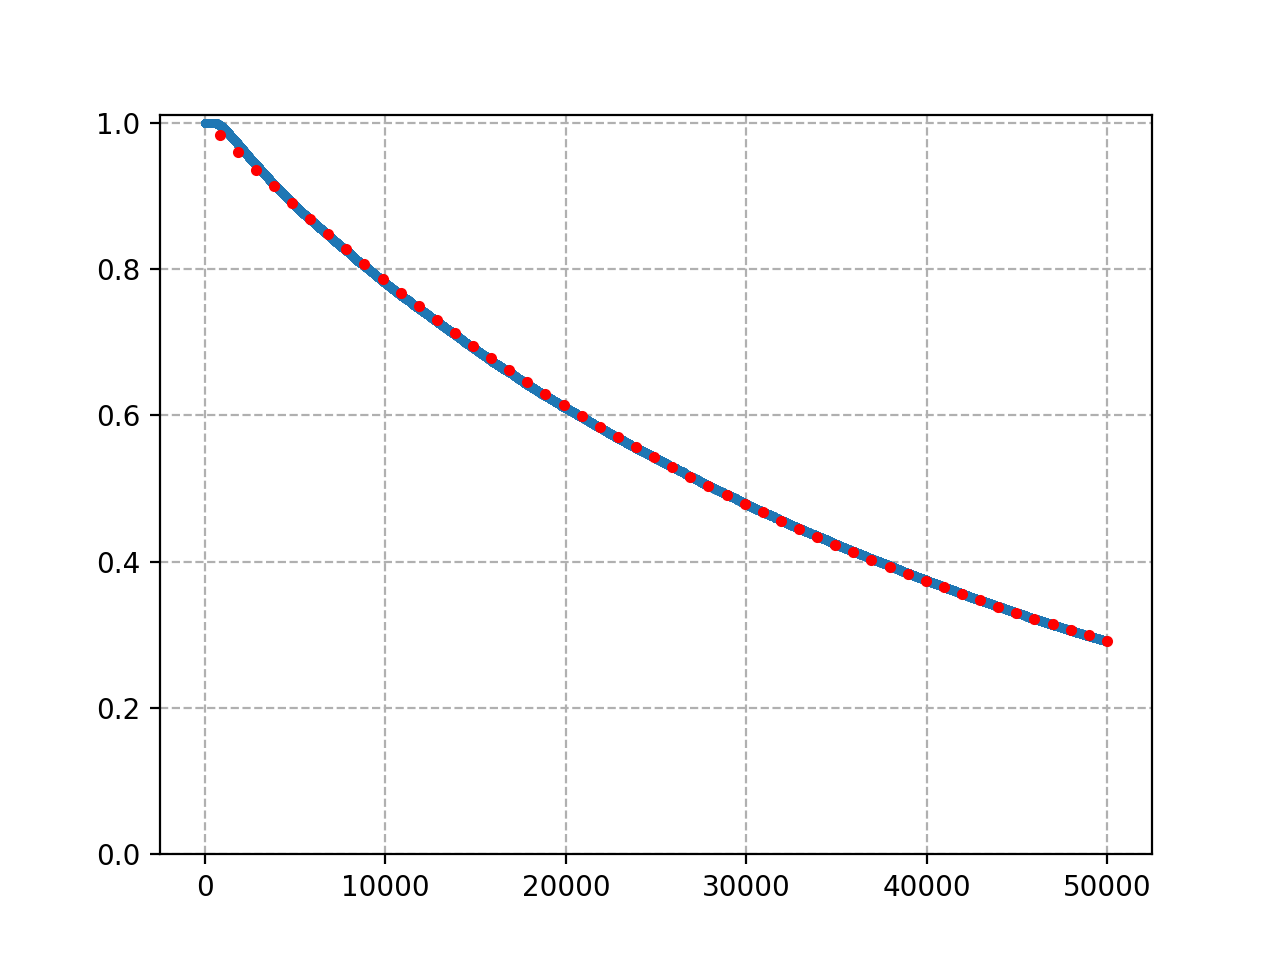

In [169]:
x=np.linspace(800,nstps,nstps-800,endpoint=True)
y=number_remain[800:]/N
print(y)
a,b = np.polyfit(x, np.log(y), 1)
print('a=',a,'b=',b)
n_x=np.linspace(800,nstps,50,endpoint=True)
#n_x=np.linspace(800,500000,50,endpoint=True)

fig2=plt.figure()
ax2=fig2.add_subplot(111)
ax2.plot(number_remain/N,'o',markersize=2)
ax2.plot(n_x,np.exp(b)*np.exp(a*n_x),'r.')
ax2.set_ylim([0,1.01])
#ax2.set_xlim([-100,5100])
ax2.grid(ls='--')

In [172]:
print('exp(b)=',np.exp(b))
print('tau=',-1/a)

exp(b)= 1.0028836794376508
tau= 40509.25416072904


The relation between remaining particles and time can be determined by $\frac{N}{N_0}=Ae^{-t/\tau}$. We can take logarithm on both sides and derive a linear relation: $\log{\frac{N}{N_0}}=\log{A}-\frac{-t}{\tau}=b+a\cdot t$. After getting rid of some initial points (800 steps have been discarded), we do a 1st order polynomial fit of the curve and get the corresponding results: $a= -2.4685717392679914e-05,\;b= 0.0028795296100353157$. Then we have $A$ to be 1.0028836794376508 and effective time constant $\tau=40509.25416072904$ steps.

**Problem 3(a)**

$f(x)=\frac{x^{-1/2}}{e^{x}+1}$, and $\omega$ is chosen to be $x^{-1/2}$. Then corresponding probability distribution is $p(x)=\frac{\omega(x)}{\int^1_0\omega(x)dx}=\frac{x^{-1/2}}{\int^1_0x^{-1/2}dx}=\frac{1}{2\sqrt{x}}$

Integrate p's expression to find its cdf:
$P(x)=\int^x_0\frac{1}{2\sqrt{x'}}dx'=\sqrt{x}$

<IPython.core.display.Javascript object>


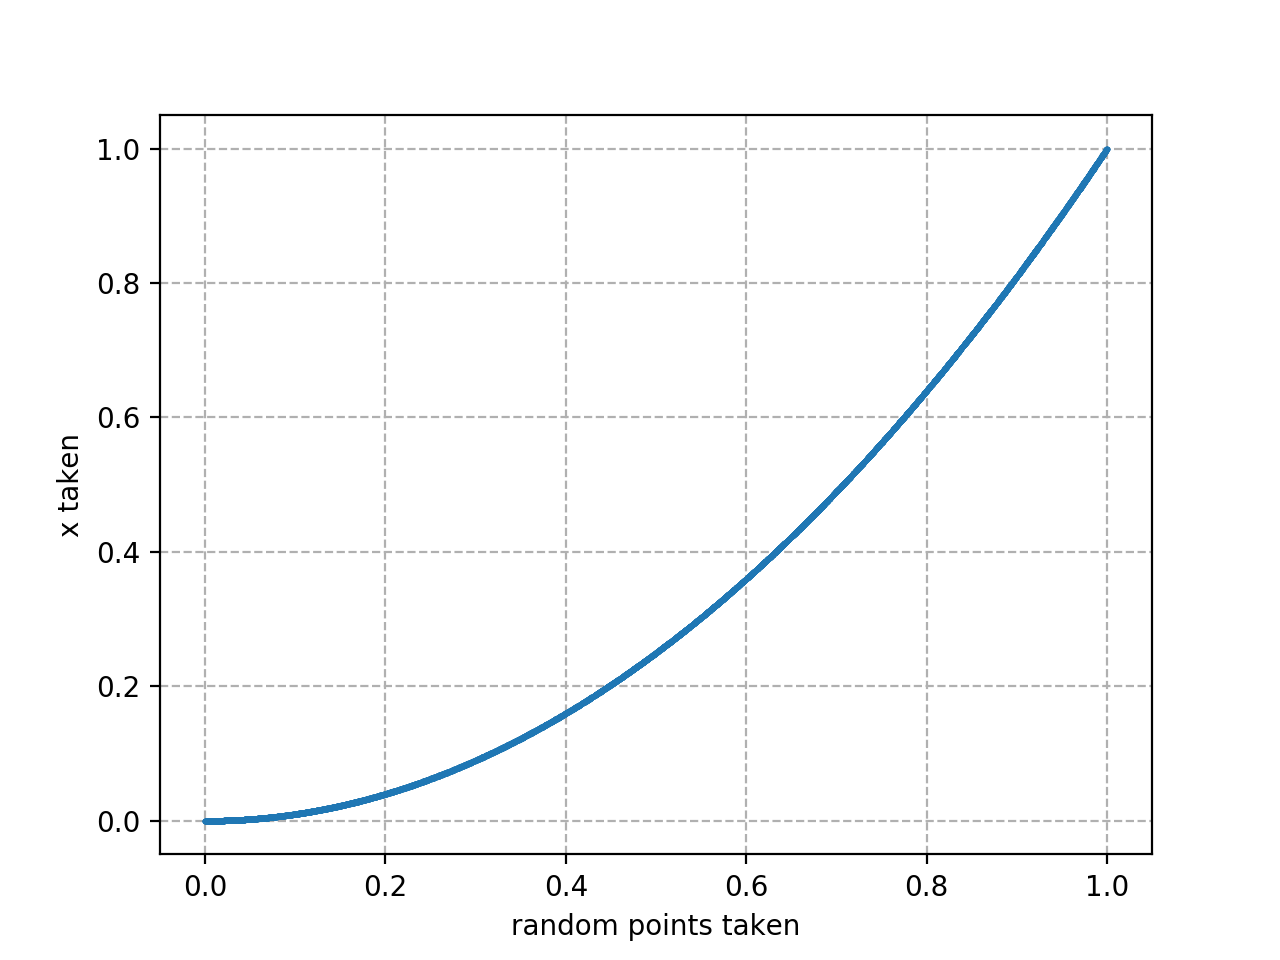

In [282]:
def p_dis(N=1000000):
    p=[]
    a_array=[]
    block=0
    n=0
    while n<N:
        a=np.random.uniform(0,1)
        block=a**2
        #if (block<=1): 
        p.append(block);n+=1
        #else:continue
        a_array.append(a)
    a_array=np.array(a_array)
    p=np.array(p)
    return a_array, p, n

a_array, p, n=p_dis(N=10000)
fig4=plt.figure()
ax4=fig4.add_subplot(111)
ax4.plot(a_array, p, 'o', markersize=1)
ax4.set_xlabel('random points taken')
ax4.set_ylabel('x taken')
ax4.grid(ls='--')
#print('n=',n)

**Problem 3(b)**

In [285]:
Num=1000000
a_array, p, n=p_dis(N=Num)
f=p**(-1/2)/(np.exp(p)+1)
Integral=f*2*np.sqrt(p)
#Integral=2/(np.exp(a_array)+1)
result=np.sum(Integral)/Num

print("result=",result)

result= 0.8388099332278133


From the result we can see that the value is getting close to 0.84.

**Useful codes**

<IPython.core.display.Javascript object>


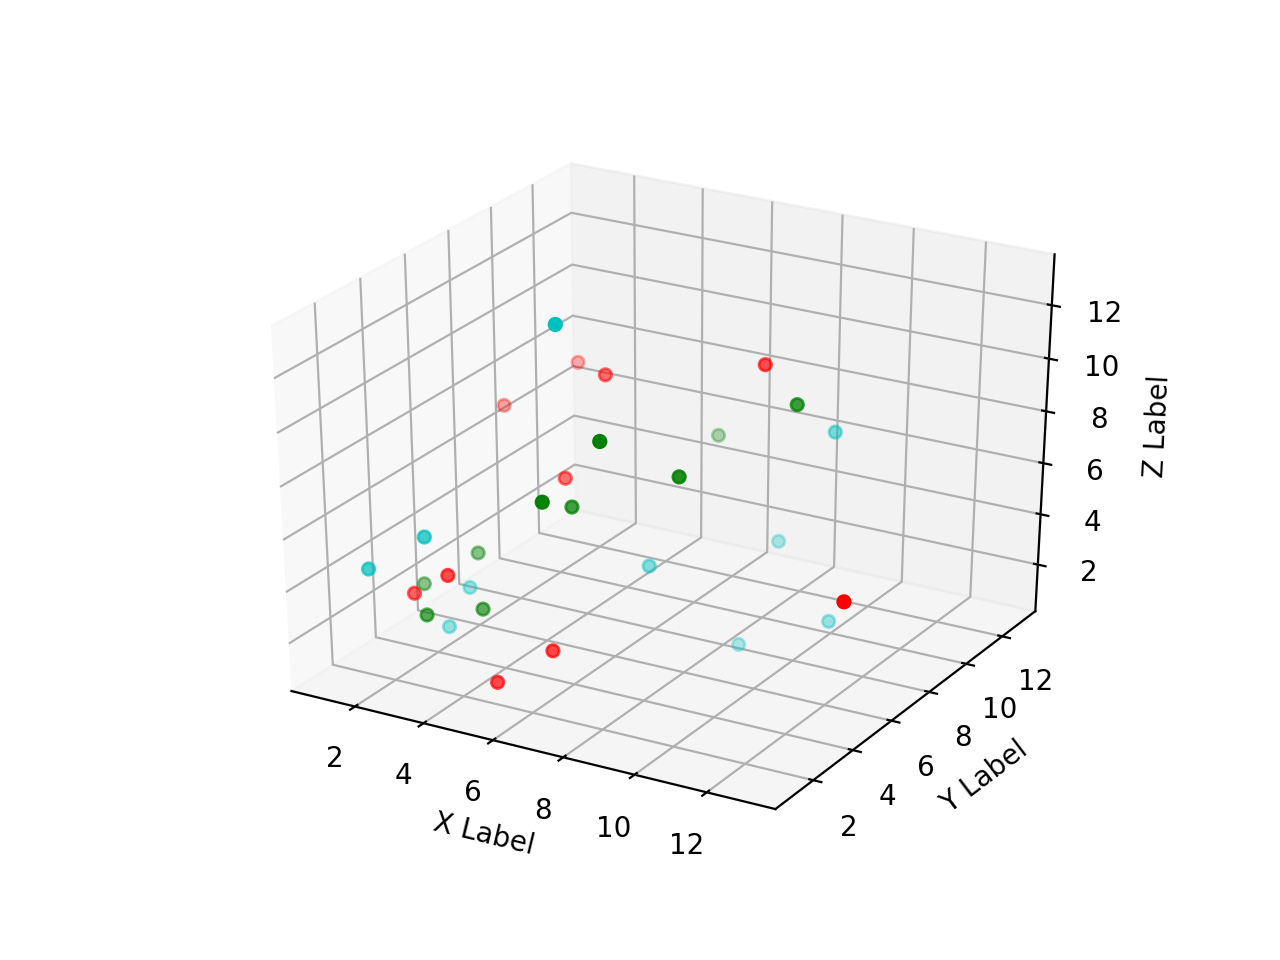

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =[1,2,3,4,5,6,7,8,9,10]
y =[5,6,2,3,13,4,1,2,4,8]
z =[2,3,3,3,5,7,9,11,9,10]
c=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
ax.scatter(x, y, z, c=c[1], marker='o')
ax.scatter(y, z, x, c=c[2], marker='o')
ax.scatter(z, x, y, c=c[3], marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()